In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Just load seaborn & set theme and the chart looks better:
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv("../data/profile_layers.csv")

In [4]:
df = df[df["is_leaf"]].copy()

In [5]:
def parse_layer_names(layer_name):
    if 'AvgPool' in layer_name:
        return 'AvgPool'
    if 'GELU' in layer_name:
        return 'GELU'
    if 'Conv2d' in layer_name:
        return 'Conv2d'
    if 'LayerNorm' in layer_name:
        return 'LayerNorm'
    return layer_name

In [6]:
df["new_layer_name"] = df["layer"].apply(parse_layer_names)

In [7]:
df['net'] = df['net'].str.replace('.laion2b_ft_in12k_in1k', '')
df['net'] = df['net'].str.replace('.ms_in22k_ft_in1k', '')
df['net'] = df['net'].str.replace('.in21k_ft_in1k', '')
df['net'] = df['net'].str.replace('.msft_in1k', '')
df['net'] = df['net'].str.replace('.mim_in22k_ft_in22k_in1k', '')
df['net'] = df['net'].str.replace('.mim_in22k_ft_in1k', '')


/tmp/ipykernel_4865/871071292.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['net'] = df['net'].str.replace('.laion2b_ft_in12k_in1k', '')
/tmp/ipykernel_4865/871071292.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['net'] = df['net'].str.replace('.ms_in22k_ft_in1k', '')
/tmp/ipykernel_4865/871071292.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['net'] = df['net'].str.replace('.in21k_ft_in1k', '')
/tmp/ipykernel_4865/871071292.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['net'] = df['net'].str.replace('.msft_in1k', '')
/tmp/ipykernel_4865/871071292.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['net'] = df['net'].str.replace('.mim_in22k_ft_in22k_in1k', '')
/tmp/ipykernel_4865/871071292.py:6: FutureW

In [8]:
df["is_leaf"] = df["is_leaf"].astype(int)

In [9]:
data_df = df[["net", "new_layer_name", "is_leaf"]].groupby(["net", "new_layer_name"]).sum().unstack().fillna(0)

In [10]:
data_df = data_df.droplevel(0, axis="columns")

In [11]:
data_df = data_df.div(data_df.sum(axis="columns"), axis=0)

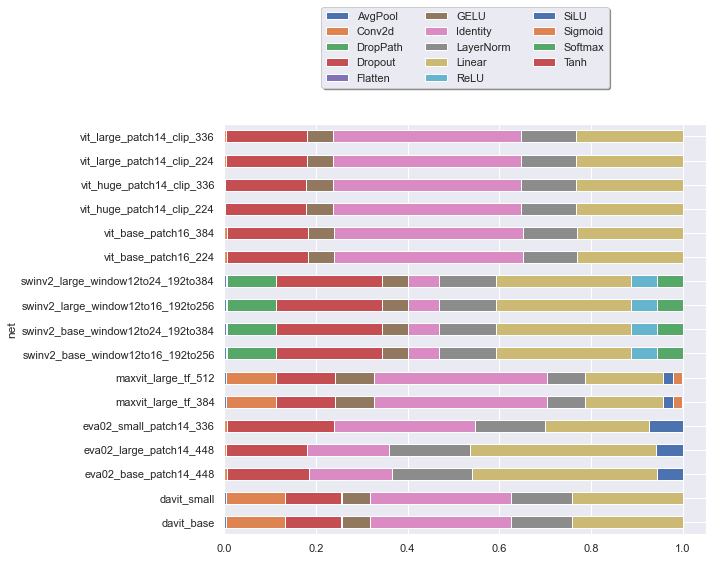

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

data_df.plot.barh(stacked=True, ax=ax)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30),
          ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig("../figures/layer_level_profiling.png")

In [18]:
df = df[df["new_layer_name"] != "Identity"]

In [19]:
data_size_df = df[["net", "new_layer_name", "output_size"]].groupby(["net", "new_layer_name"]).sum().unstack().fillna(0)
data_size_df = data_size_df.droplevel(0, axis="columns")
data_size_df = data_size_df.div(data_size_df.sum(axis="columns"), axis=0)


In [20]:
data_size_df

new_layer_name,AvgPool,Conv2d,DropPath,Dropout,Flatten,GELU,LayerNorm,Linear,ReLU,SiLU,Sigmoid,Softmax,Tanh
net,,,,,,,,,,,,,
davit_base,0.000015,0.099208,0.000000,0.221269,1.456580e-05,0.177004,0.104218,0.398272,0.000000,0.000000,0.000000,0.000000,0.000000e+00
davit_small,0.000015,0.099207,0.000000,0.221268,1.456573e-05,0.177003,0.104218,0.398275,0.000000,0.000000,0.000000,0.000000,0.000000e+00
eva02_base_patch14_448,0.000000,0.003700,0.000000,0.211113,0.000000e+00,0.000000,0.207409,0.459260,0.000000,0.118518,0.000000,0.000000,0.000000e+00
eva02_large_patch14_448,0.000000,0.001857,0.000000,0.210040,0.000000e+00,0.000000,0.208181,0.460976,0.000000,0.118947,0.000000,0.000000,0.000000e+00
eva02_small_patch14_336,0.000000,0.004942,0.000000,0.282178,0.000000e+00,0.000000,0.118817,0.435652,0.000000,0.158411,0.000000,0.000000,0.000000e+00
maxvit_large_tf_384,0.002499,0.191375,0.000000,0.182405,1.507963e-06,0.289239,0.060803,0.273608,0.000000,0.000004,0.000065,0.000000,1.507963e-06
maxvit_large_tf_512,0.002498,0.191357,0.000000,0.182416,8.482841e-07,0.289258,0.060806,0.273624,0.000000,0.000002,0.000036,0.000000,8.482841e-07
swinv2_base_window12to16_192to256,0.000006,0.003119,0.042102,0.333701,0.000000e+00,0.096678,0.054576,0.215380,0.065760,0.000000,0.000000,0.188678,0.000000e+00
swinv2_base_window12to24_192to384,0.000002,0.002115,0.028551,0.386228,0.000000e+00,0.065561,0.037010,0.147069,0.045580,0.000000,0.000000,0.287885,0.000000e+00


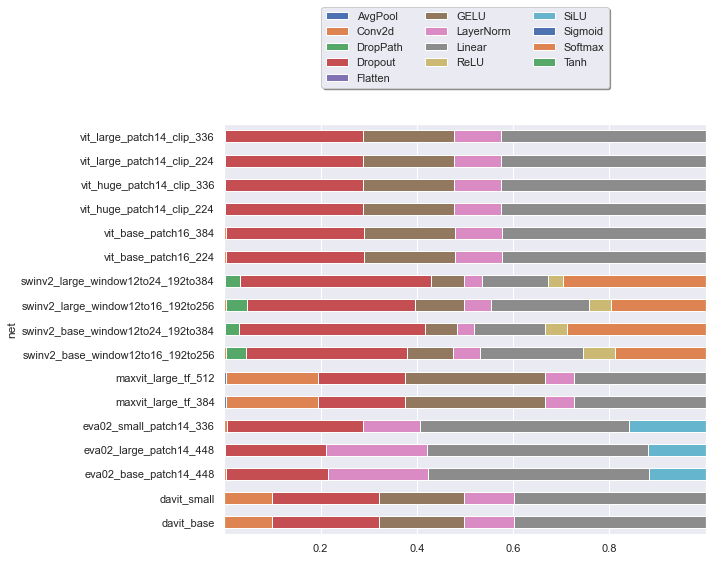

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

data_size_df.plot.barh(stacked=True, ax=ax)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30),
          ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig("../figures/layer_level_profiling.png")